# <font color='52527a'>*Cotton Leaf Disease Prediction - 1*</font>

## <font color='52527a'>*Import Libraries*</font>
---

In [1]:
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## <font color='52527a'>*Import Dataset*</font>
---

### <font color='52527a'>*Import Training Dataset:*</font>

In [ ]:
# Get images paths in dictionary
train_images_paths_dict = {}
for folder_name in ["diseased cotton leaf", "diseased cotton plant", "fresh cotton leaf", "fresh cotton plant"]:
    root_path = "/content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/train/{}/".format(folder_name)
    images = os.listdir(path = root_path)
    images_paths = []
    for image in images:
        images_paths.append(root_path + image)
    train_images_paths_dict[folder_name] = images_paths

In [ ]:
images_labels_dict = {
    "diseased cotton leaf" : 0,
    "diseased cotton plant" : 1,
    "fresh cotton leaf" : 2,
    "fresh cotton plant" : 3
}
images_labels_dict

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
# Convert images into numpy array and store it in a list
X_train_images = []
y_train_labels = []

for label, images_paths in train_images_paths_dict.items():
    for image_path in images_paths:
        img = cv2.imread(image_path)
        X_train_images.append(img)
        y_train_labels.append(images_labels_dict[label])

In [ ]:
# Resize all images to 180x180
X_train_resized_images = []
for image in X_train_images:
    resized_image = cv2.resize(image, (180, 180))
    X_train_resized_images.append(resized_image)

In [ ]:
X_train = np.array(X_train_resized_images)
X_train.shape

(1951, 180, 180, 3)

In [ ]:
y_train = np.array(y_train_labels)
y_train.shape

(1951,)

In [ ]:
np.save("Training_Images.npy", X_train)
np.save("Training_Labels.npy", y_train)

In [2]:
X_train = np.load("/content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/Training_Images.npy")
y_train = np.load("/content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/Training_Labels.npy")

In [4]:
X_train.shape, y_train.shape

((1951, 180, 180, 3), (1951,))

### <font color='52527a'>*Import Validation Dataset:*</font>

In [ ]:
# Get images paths in dictionary
validation_images_paths_dict = {}
for folder_name in ["diseased cotton leaf", "diseased cotton plant", "fresh cotton leaf", "fresh cotton plant"]:
    root_path = "/content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/val/{}/".format(folder_name)
    images = os.listdir(path = root_path)
    images_paths = []
    for image in images:
        images_paths.append(root_path + image)
    validation_images_paths_dict[folder_name] = images_paths

In [ ]:
images_labels_dict = {
    "diseased cotton leaf" : 0,
    "diseased cotton plant" : 1,
    "fresh cotton leaf" : 2,
    "fresh cotton plant" : 3
}
images_labels_dict

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
# Convert images into numpy array and store it in a list
X_val_images = []
y_val_labels = []

for label, images_paths in validation_images_paths_dict.items():
    for image_path in images_paths:
        img = cv2.imread(image_path)
        X_val_images.append(img)
        y_val_labels.append(images_labels_dict[label])

In [ ]:
# Resize all images to 180x180
X_val_resized_images = []
for image in X_val_images:
    resized_image = cv2.resize(image, (180, 180))
    X_val_resized_images.append(resized_image)

In [ ]:
X_val = np.array(X_val_resized_images)
X_val.shape

(253, 180, 180, 3)

In [ ]:
y_val = np.array(y_val_labels)
y_val.shape

(253,)

In [ ]:
np.save("Validation_Images.npy", X_val)
np.save("Validation_Labels.npy", y_val)

In [ ]:
X_val = np.load("/content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/Validation_Images.npy")
y_val = np.load("/content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/Validation_Labels.npy")

In [ ]:
X_train.shape, X_val.shape

((1951, 180, 180, 3), (253, 180, 180, 3))

In [ ]:
y_train.shape, y_val.shape

((1951,), (253,))

## <font color='52527a'>*Data Visualization*</font>
---

### <font color='52527a'>*Diseased cotton leaf images:*</font>

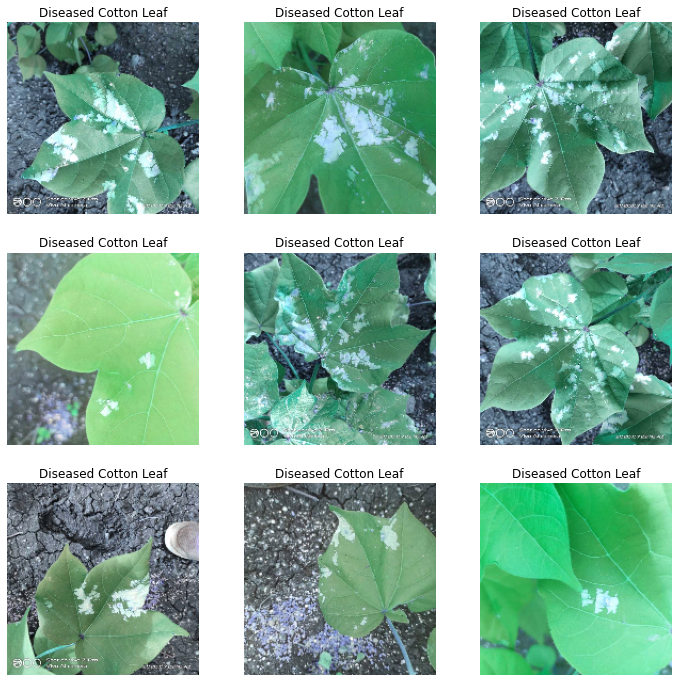

In [40]:
plt.figure(figsize = (12,12))
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.axis("off")
    plt.imshow(X_train[i])
    plt.title("Diseased Cotton Leaf")

plt.show()

### <font color='52527a'>*Diseased cotton plant images:*</font>

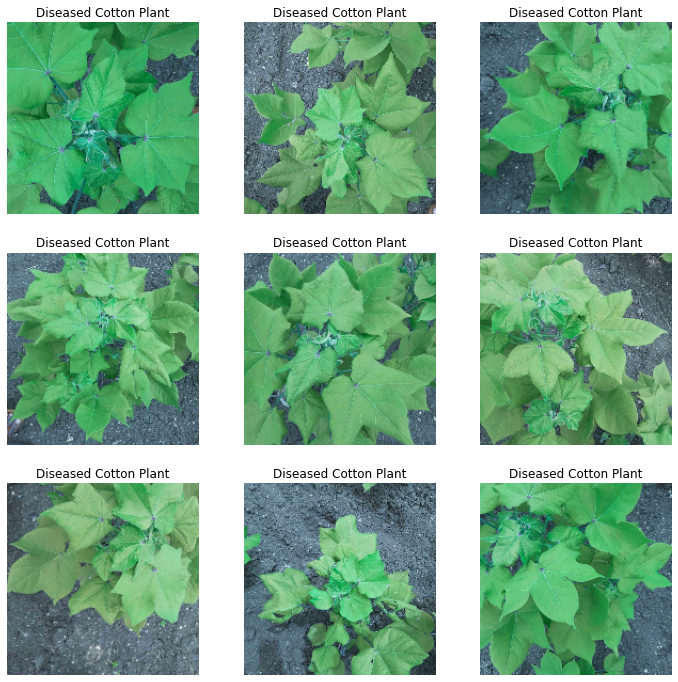

In [41]:
plt.figure(figsize = (12,12))
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.axis("off")
    plt.imshow(X_train[287+i])
    plt.title("Diseased Cotton Plant")

plt.show()

### <font color='52527a'>*Fresh cotton leaf images:*</font>

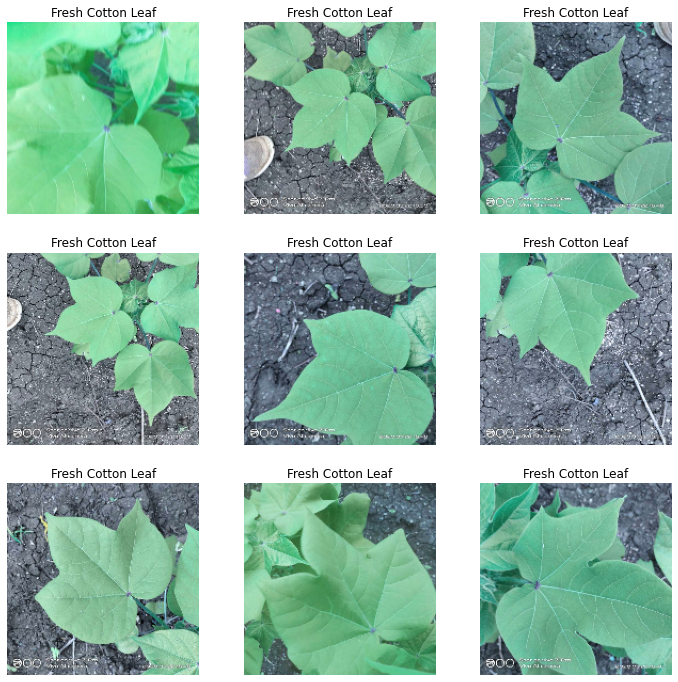

In [42]:
plt.figure(figsize = (12,12))
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.axis("off")
    plt.imshow(X_train[1102+i])
    plt.title("Fresh Cotton Leaf")

plt.show()

### <font color='52527a'>*Fresh cotton plant images:*</font>

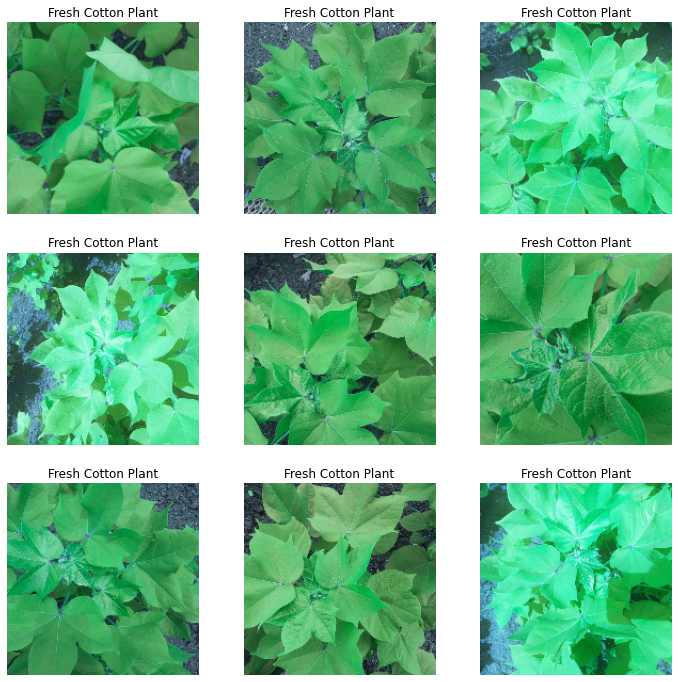

In [44]:
plt.figure(figsize = (12,12))
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.axis("off")
    plt.imshow(X_train[1529+i])
    plt.title("Fresh Cotton Plant")

plt.show()

## <font color='52527a'>*Scaling Images*</font>
---

In [ ]:
X_train_scaled = X_train / 255
X_val_scaled = X_val / 255

In [ ]:
y_train_coded = keras.utils.to_categorical(y_train)
y_train_coded

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_val_coded = keras.utils.to_categorical(y_val)
y_val_coded

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

## <font color='52527a'>*Build A CNN Model*</font>
---

### <font color='52527a'>*Initialize The Model:*</font>

In [ ]:
model = Sequential([
    layers.Conv2D(filters = 16, kernel_size = 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(units = 128, activation = "relu"),
    layers.Dense(4, activation = "softmax") # Because the are 4 classes
])

### <font color='52527a'>*Compile The Model:*</font>

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

### <font color='52527a'>*Train The Model:*</font>

In [ ]:
model.fit(X_train_scaled, y_train_coded, epochs = 30, batch_size = 16)

Epoch 1/30
122/122 [==============================] - 2s 14ms/step - loss: 0.9767 - accuracy: 0.5771
Epoch 2/30
122/122 [==============================] - 2s 13ms/step - loss: 0.5765 - accuracy: 0.7709
Epoch 3/30
122/122 [==============================] - 2s 13ms/step - loss: 0.4156 - accuracy: 0.8324
Epoch 4/30
122/122 [==============================] - 2s 12ms/step - loss: 0.3549 - accuracy: 0.8631
Epoch 5/30
122/122 [==============================] - 2s 12ms/step - loss: 0.2907 - accuracy: 0.8888
Epoch 6/30
122/122 [==============================] - 2s 13ms/step - loss: 0.2679 - accuracy: 0.9016
Epoch 7/30
122/122 [==============================] - 2s 12ms/step - loss: 0.1716 - accuracy: 0.9344
Epoch 8/30
122/122 [==============================] - 2s 13ms/step - loss: 0.1282 - accuracy: 0.9549
Epoch 9/30
122/122 [==============================] - 2s 12ms/step - loss: 0.1419 - accuracy: 0.9431
Epoch 10/30
122/122 [==============================] - 2s 13ms/step - loss: 0.0918 - accura

### <font color='52527a'>*Evaluate The Model:*</font>

In [ ]:
model.evaluate(X_val_scaled, y_val_coded)

8/8 [==============================] - 0s 23ms/step - loss: 0.6284 - accuracy: 0.9249


[0.6283714175224304, 0.9249011874198914]

In [ ]:
predictions = model.predict(X_val_scaled)

In [ ]:
predictions

array([[1.0000000e+00, 1.1807850e-08, 2.3890742e-13, 1.8015960e-22],
       [4.2475712e-01, 5.7367999e-03, 5.6163257e-01, 7.8735501e-03],
       [9.9999189e-01, 2.9442736e-11, 3.4506040e-12, 8.0483087e-06],
       ...,
       [2.9868521e-09, 2.1535531e-02, 3.4533734e-10, 9.7846448e-01],
       [3.0805811e-08, 9.6606278e-01, 2.6437896e-09, 3.3937212e-02],
       [1.4223551e-15, 1.2720392e-08, 2.6492499e-13, 1.0000000e+00]],
      dtype=float32)

In [ ]:
prediction_labels = []
for prediction in predictions:
    prediction_labels.append(np.argmax(prediction))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print("Accuracy Score:", accuracy_score(y_true = y_val, y_pred = prediction_labels))

Accuracy Score: 0.924901185770751


In [ ]:
print(classification_report(y_true = y_val, y_pred = prediction_labels))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.88      0.95      0.91        78
           2       0.95      0.94      0.95        66
           3       0.90      0.86      0.88        66

    accuracy                           0.92       253
   macro avg       0.93      0.93      0.93       253
weighted avg       0.93      0.92      0.93       253



In [ ]:
cm = confusion_matrix(y_true = y_val, y_pred = prediction_labels)
cm

array([[41,  1,  1,  0],
       [ 0, 74,  0,  4],
       [ 0,  2, 62,  2],
       [ 0,  7,  2, 57]])

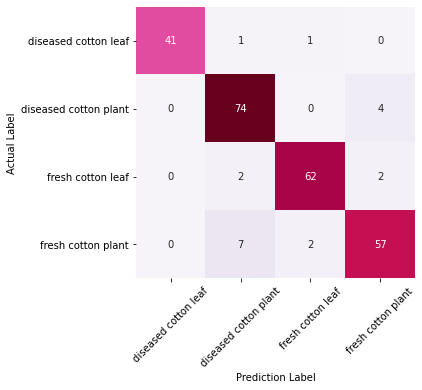

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, 
            annot = True, 
            xticklabels = ["diseased cotton leaf", "diseased cotton plant", "fresh cotton leaf", "fresh cotton plant"],
            yticklabels = ["diseased cotton leaf", "diseased cotton plant", "fresh cotton leaf", "fresh cotton plant"],
            cbar = False,
            cmap = "PuRd")
plt.xticks(rotation = 45)
plt.xlabel("Prediction Label")
plt.ylabel("Actual Label")
plt.show()

## <font color='52527a'>*Build A CNN Model With Data Augmentation*</font>
---

### <font color='52527a'>*Initialize Data Augmentation:*</font>

In [ ]:
data_augmentation = Sequential([
                                layers.experimental.preprocessing.RandomFlip("horizontal"),
                                layers.experimental.preprocessing.RandomRotation(0.1),
                                layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
model = Sequential([
    data_augmentation,                
    layers.Conv2D(filters = 16, kernel_size = 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(filters = 128, kernel_size = 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(units = 128, activation = "relu"),
    layers.Dense(4, activation = "softmax") # Because the are 4 classes
])

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
model.fit(X_train_scaled, y_train_coded, epochs = 50, batch_size = 16)

Epoch 1/50
122/122 [==============================] - 3s 15ms/step - loss: 1.0974 - accuracy: 0.5310
Epoch 2/50
122/122 [==============================] - 2s 14ms/step - loss: 0.8891 - accuracy: 0.6612
Epoch 3/50
122/122 [==============================] - 2s 14ms/step - loss: 0.6742 - accuracy: 0.7406
Epoch 4/50
122/122 [==============================] - 2s 14ms/step - loss: 0.5083 - accuracy: 0.8022
Epoch 5/50
122/122 [==============================] - 2s 14ms/step - loss: 0.5201 - accuracy: 0.8011
Epoch 6/50
122/122 [==============================] - 2s 14ms/step - loss: 0.4910 - accuracy: 0.8098
Epoch 7/50
122/122 [==============================] - 2s 14ms/step - loss: 0.4226 - accuracy: 0.8350
Epoch 8/50
122/122 [==============================] - 2s 14ms/step - loss: 0.3936 - accuracy: 0.8478
Epoch 9/50
122/122 [==============================] - 2s 14ms/step - loss: 0.3962 - accuracy: 0.8355
Epoch 10/50
122/122 [==============================] - 2s 14ms/step - loss: 0.3671 - accura

In [ ]:
model.evaluate(X_val_scaled, y_val_coded)

8/8 [==============================] - 0s 13ms/step - loss: 0.0546 - accuracy: 0.9842


[0.05462276190519333, 0.9841897487640381]

In [ ]:
predictions = model.predict(X_val_scaled)

In [ ]:
predictions

array([[9.9999642e-01, 3.6158501e-06, 6.7520154e-09, 1.9572926e-08],
       [9.9851221e-01, 1.4866632e-03, 1.7610385e-07, 8.6910808e-07],
       [1.0000000e+00, 7.2661144e-10, 1.7067508e-08, 1.9008821e-09],
       ...,
       [6.1262563e-06, 3.3044998e-02, 7.2701368e-04, 9.6622187e-01],
       [1.3868256e-06, 5.2766283e-03, 4.8289844e-04, 9.9423909e-01],
       [5.9883747e-05, 4.6839118e-02, 3.3545768e-04, 9.5276541e-01]],
      dtype=float32)

In [ ]:
prediction_labels = []
for prediction in predictions:
    prediction_labels.append(np.argmax(prediction))

In [ ]:
print("Accuracy Score:", accuracy_score(y_true = y_val, y_pred = prediction_labels))

Accuracy Score: 0.9841897233201581


In [ ]:
print(classification_report(y_true = y_val, y_pred = prediction_labels))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       0.99      1.00      0.99        78
           2       0.98      0.97      0.98        66
           3       1.00      0.97      0.98        66

    accuracy                           0.98       253
   macro avg       0.98      0.98      0.98       253
weighted avg       0.98      0.98      0.98       253



In [ ]:
cm = confusion_matrix(y_true = y_val, y_pred = prediction_labels)
cm

array([[43,  0,  0,  0],
       [ 0, 78,  0,  0],
       [ 2,  0, 64,  0],
       [ 0,  1,  1, 64]])

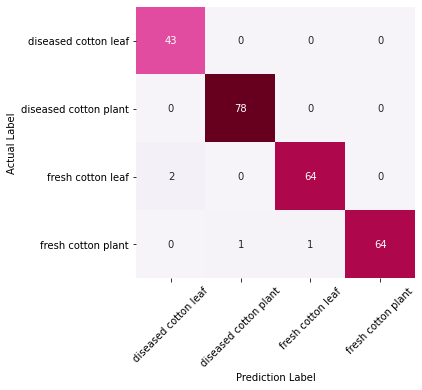

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, 
            annot = True, 
            xticklabels = ["diseased cotton leaf", "diseased cotton plant", "fresh cotton leaf", "fresh cotton plant"],
            yticklabels = ["diseased cotton leaf", "diseased cotton plant", "fresh cotton leaf", "fresh cotton plant"],
            cbar = False,
            cmap = "PuRd")
plt.xticks(rotation = 45)
plt.xlabel("Prediction Label")
plt.ylabel("Actual Label")
plt.show()

## <font color='52527a'>*Save The Model*</font>
---

In [ ]:
model.save("/content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/Models/model2.h5")

## <font color='52527a'>*Making Predictions With Saved Model*</font>
---

In [45]:
model = keras.models.load_model("/content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/Models/model2.h5")

In [56]:
def cotton_disease_predictor():
    img_path = input("Enter image path here: ")
    print("--------------------------------------------------------------------------------------")
    img = cv2.imread(img_path)
    img_res = cv2.resize(img, (180,180))
    plt.axis("off")
    plt.imshow(img_res)
    plt.show()
    img_res_scaled = img_res / 255
    img_res_scaled = np.reshape(img_res_scaled, (1, 180, 180, 3))
    prediction = model.predict(img_res_scaled)
    pred_number = np.argmax(prediction[0])
    labels = ["diseased cotton leaf", "diseased cotton plant", "fresh cotton leaf", "fresh cotton plant"]
    print("Prediction is:", labels[pred_number])

Enter image path here: /content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/test/fresh cotton leaf/d (7)_iaip.jpg
--------------------------------------------------------------------------------------


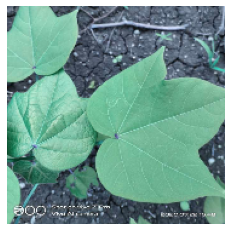

Prediction is: fresh cotton leaf


In [58]:
cotton_disease_predictor()

Enter image path here: /content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/test/diseased cotton leaf/dis_leaf (206)_iaip.jpg


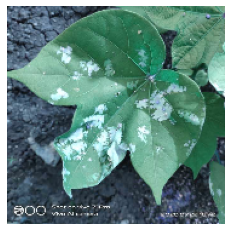

Prediction is: diseased cotton leaf


In [53]:
cotton_disease_predictor()

Enter image path here: /content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/test/diseased cotton plant/dd (862)_iaip.jpg


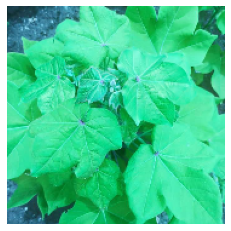

Prediction is: diseased cotton plant


In [54]:
cotton_disease_predictor()

Enter image path here: /content/drive/MyDrive/Deep Learning/CottonLeafDiseasePredtion/test/fresh cotton plant/dsd (223).jpg


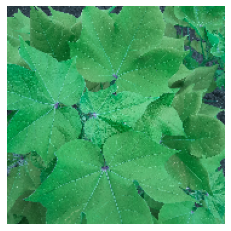

Prediction is: fresh cotton plant


In [55]:
cotton_disease_predictor()